<a href="https://colab.research.google.com/github/ChargeZoo/2012645-/blob/main/%EA%B3%BC%EC%A0%9C2_2012645_%EC%A0%84%ED%95%98%EC%A3%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. 실습 과제 1. Lab 3 CNN MNIST 실습에서 Dropout 을 추가하기 전과 후의 모델을 각각 학습시키고 결과를 논의하세요.

1-1 Dropout 을 추가하기 전 모델

In [3]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch import nn, optim
from torch.utils.data import DataLoader

# Step 1: Define the transformations and load the MNIST dataset
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,), (0.5,))])

trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                      download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=False,
                                     download=True, transform=transform)
testloader = DataLoader(testset, batch_size=64, shuffle=False)

# Step 2: Define the CNN architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.fc1 = nn.Linear(9216, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = nn.functional.relu(x)
        x = self.conv2(x)
        x = nn.functional.relu(x)
        x = nn.functional.max_pool2d(x, 2)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = nn.functional.relu(x)
        x = self.fc2(x)
        output = nn.functional.log_softmax(x, dim=1)
        return output

# Step 3: Define a Loss function and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

# Step 4: Train the Network
for epoch in range(10):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        if i % 200 == 199:  # print every 200 mini-batches
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 200:.3f}')
            running_loss = 0.0

print('Finished Training')

# Step 5: Test the network on the test data
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10,000 test images: {100 * correct / total}%')


Epoch 1, Batch 200, Loss: 0.003
Epoch 1, Batch 400, Loss: 0.006
Epoch 1, Batch 600, Loss: 0.008
Epoch 1, Batch 800, Loss: 0.008
Epoch 2, Batch 200, Loss: 0.001
Epoch 2, Batch 400, Loss: 0.003
Epoch 2, Batch 600, Loss: 0.005
Epoch 2, Batch 800, Loss: 0.009
Epoch 3, Batch 200, Loss: 0.002
Epoch 3, Batch 400, Loss: 0.003
Epoch 3, Batch 600, Loss: 0.003
Epoch 3, Batch 800, Loss: 0.004
Epoch 4, Batch 200, Loss: 0.004
Epoch 4, Batch 400, Loss: 0.006
Epoch 4, Batch 600, Loss: 0.006
Epoch 4, Batch 800, Loss: 0.005
Epoch 5, Batch 200, Loss: 0.002
Epoch 5, Batch 400, Loss: 0.001
Epoch 5, Batch 600, Loss: 0.005
Epoch 5, Batch 800, Loss: 0.003
Epoch 6, Batch 200, Loss: 0.002
Epoch 6, Batch 400, Loss: 0.003
Epoch 6, Batch 600, Loss: 0.001
Epoch 6, Batch 800, Loss: 0.002
Epoch 7, Batch 200, Loss: 0.002
Epoch 7, Batch 400, Loss: 0.003
Epoch 7, Batch 600, Loss: 0.008
Epoch 7, Batch 800, Loss: 0.005
Epoch 8, Batch 200, Loss: 0.004
Epoch 8, Batch 400, Loss: 0.006
Epoch 8, Batch 600, Loss: 0.001
Epoch 8,

In [5]:
# prompt: count the total number of learnable parameters

total_params = sum(p.numel() for p in net.parameters())
print(f"Total Parameters: {total_params/1000} k")

# prompt: save the model with the name including dropout
torch.save(net.state_dict(), 'minst_net_with_dropout.pt')


Total Parameters: 1199.882 k


1-2 Dropout 을 추가한 후

In [4]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch import nn, optim
from torch.utils.data import DataLoader

# Step 1: Define the transformations and load the MNIST dataset
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,), (0.5,))])

trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                      download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=False,
                                     download=True, transform=transform)
testloader = DataLoader(testset, batch_size=64, shuffle=False)

# Step 2: Define the CNN architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.dropout1 = nn.Dropout2d(0.25)
        self.dropout2 = nn.Dropout2d(0.5)
        self.fc1 = nn.Linear(9216, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = nn.functional.relu(x)
        x = self.conv2(x)
        x = nn.functional.relu(x)
        x = nn.functional.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = nn.functional.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        output = nn.functional.log_softmax(x, dim=1)
        return output

# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# net = Net().to(device)
net = Net()

# Step 3: Define a Loss function and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

# Step 4: Train the Network
for epoch in range(10):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        # inputs, labels = data[0].to(device), data[1].to(device)

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        if i % 200 == 199:  # print every 200 mini-batches
            accuracy = 100 * correct / total
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 200:.3f}, Accuracy: {accuracy:.2f}%')
            running_loss = 0.0
            correct = 0
            total = 0

print('Finished Training')

# Step 5: Test the network on the test data
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        # images, labels = data
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10,000 test images: {100 * correct / total}%')

/usr/local/lib/python3.10/dist-packages/torch/nn/functional.py:1347: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


Epoch 1, Batch 200, Loss: 0.499, Accuracy: 90.88%
Epoch 1, Batch 400, Loss: 0.175, Accuracy: 94.84%
Epoch 1, Batch 600, Loss: 0.143, Accuracy: 95.84%
Epoch 1, Batch 800, Loss: 0.121, Accuracy: 96.38%
Epoch 2, Batch 200, Loss: 0.091, Accuracy: 97.15%
Epoch 2, Batch 400, Loss: 0.088, Accuracy: 97.25%
Epoch 2, Batch 600, Loss: 0.088, Accuracy: 97.42%
Epoch 2, Batch 800, Loss: 0.087, Accuracy: 97.55%
Epoch 3, Batch 200, Loss: 0.068, Accuracy: 97.85%
Epoch 3, Batch 400, Loss: 0.075, Accuracy: 97.67%
Epoch 3, Batch 600, Loss: 0.064, Accuracy: 98.05%
Epoch 3, Batch 800, Loss: 0.063, Accuracy: 98.09%
Epoch 4, Batch 200, Loss: 0.060, Accuracy: 98.15%
Epoch 4, Batch 400, Loss: 0.051, Accuracy: 98.42%
Epoch 4, Batch 600, Loss: 0.059, Accuracy: 98.15%
Epoch 4, Batch 800, Loss: 0.056, Accuracy: 98.34%
Epoch 5, Batch 200, Loss: 0.046, Accuracy: 98.41%
Epoch 5, Batch 400, Loss: 0.048, Accuracy: 98.41%
Epoch 5, Batch 600, Loss: 0.043, Accuracy: 98.59%
Epoch 5, Batch 800, Loss: 0.051, Accuracy: 98.55%


NameError: name 'device' is not defined

실습 과제 2. Lab 3 CNN MNIST 실습에서 데이터셋을 CIFAR10으로 바꾸고 Global
Average Pooling를 추가하기 전과 후 모델을 각각 수정하여 약 1M 개의 파라미터로 학습시키고 비교하여 결과를 논의하세요.

2-1  Global Average Pooling 추가 전


In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch import nn, optim
from torch.utils.data import DataLoader
import torch.nn.functional as F

# Step 1: Load the CIFAR-10 dataset with transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = DataLoader(testset, batch_size=64, shuffle=False)

# Step 2: Define the CNN architecture without Global Average Pooling
class NetWithoutGap(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 128, 3, padding=1)
        self.bn1 = nn.BatchNorm2d(128)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(128, 256, 3, padding=1)
        self.bn2 = nn.BatchNorm2d(256)
        self.fc1 = nn.Linear(256 * 8 * 8, 512)  # Calculate the output size after convolutions and pooling
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.bn1(self.conv1(x))))
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        x = x.view(-1, 256 * 8 * 8)  # Flatten before fully connected layers
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Step 3: Setup GPU usage
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Step 4: Define a function to count the number of parameters in a model
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

# Step 5: Instantiate the model and move to GPU
net_without_gap = NetWithoutGap().to(device)

# Step 6: Check the number of parameters in the model
print(f"Number of parameters in model without Global Average Pooling: {count_parameters(net_without_gap)}")

# Step 7: Setup the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer_without_gap = optim.Adam(net_without_gap.parameters(), lr=0.001)

# Step 8: Train the model
def train(net, optimizer):
    for epoch in range(10):
        running_loss = 0.0
        correct = 0
        total = 0
        for i, data in enumerate(trainloader, 0):
            inputs, labels = data[0].to(device), data[1].to(device)

            optimizer.zero_grad()

            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            if i % 200 == 199:  # print every 200 mini-batches
                accuracy = 100 * correct / total
                print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 200:.3f}, Accuracy: {accuracy:.2f}%')
                running_loss = 0.0
                correct = 0
                total = 0

    print('Finished Training')

print("Training model without Global Average Pooling:")
train(net_without_gap, optimizer_without_gap)

# Step 9: Evaluate the model on the test data
def test(net):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data[0].to(device), data[1].to(device)
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f'Accuracy of the network on the 10,000 test images: {100 * correct / total}%')

print("Testing model without Global Average Pooling:")
test(net_without_gap)


100%|██████████| 170498071/170498071 [00:13<00:00, 12940872.03it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Number of parameters in model without Global Average Pooling: 8693770
Training model without Global Average Pooling:
Epoch 1, Batch 200, Loss: 2.198, Accuracy: 35.34%
Epoch 1, Batch 400, Loss: 1.371, Accuracy: 50.40%
Epoch 1, Batch 600, Loss: 1.173, Accuracy: 57.21%
Epoch 2, Batch 200, Loss: 0.976, Accuracy: 65.84%
Epoch 2, Batch 400, Loss: 0.958, Accuracy: 65.83%
Epoch 2, Batch 600, Loss: 0.933, Accuracy: 66.73%
Epoch 3, Batch 200, Loss: 0.818, Accuracy: 71.05%
Epoch 3, Batch 400, Loss: 0.806, Accuracy: 71.73%
Epoch 3, Batch 600, Loss: 0.799, Accuracy: 72.19%
Epoch 4, Batch 200, Loss: 0.709, Accuracy: 74.86%
Epoch 4, Batch 400, Loss: 0.721, Accuracy: 74.59%
Epoch 4, Batch 600, Loss: 0.716, Accuracy: 74.76%
Epoch 5, Batch 200, Loss: 0.620, Accuracy: 78.18%
Epoch 5, Batch 400, Loss: 0.610, Accuracy: 78.33%
Epoch 5, Batch 600, Loss: 0.641, Accuracy: 77.66%
Epoch 6, Batch 200, Loss: 0.532, Accuracy: 8

In [ ]:
# Count the total number of learnable parameters
total_params = sum(p.numel() for p in net_without_gap.parameters())
print(f"Total Parameters: {total_params/1000} k")

Total Parameters: 8693.77 k


2-2 Global Average Pooling 추가 후




In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch import nn, optim
from torch.utils.data import DataLoader
import torch.nn.functional as F

# Step 1: Load the CIFAR-10 dataset with transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = DataLoader(testset, batch_size=64, shuffle=False)

# Step 2: Define the CNN architecture with Global Average Pooling
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 64, 3, padding=1)
        self.bn1 = nn.BatchNorm2d(64)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(64, 128, 3, padding=1)
        self.bn2 = nn.BatchNorm2d(128)
        self.conv3 = nn.Conv2d(128, 256, 3, padding=1)
        self.bn3 = nn.BatchNorm2d(256)
        self.global_avg_pool = nn.AdaptiveAvgPool2d(1)
        self.fc1 = nn.Linear(256, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.bn1(self.conv1(x))))
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        x = self.pool(F.relu(self.bn3(self.conv3(x))))
        x = self.global_avg_pool(x)
        x = x.view(-1, 256)  # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Step 3: Setup GPU usage
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net = Net().to(device)

# Step 4: Setup the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

# Step 5: Train the network
for epoch in range(10):
    running_loss = 0.0
    correct = 0
    total = 0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        if i % 200 == 199:  # print every 200 mini-batches
            accuracy = 100 * correct / total
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 200:.3f}, Accuracy: {accuracy:.2f}%')
            running_loss = 0.0
            correct = 0
            total = 0

print('Finished Training')

# Step 6: Evaluate the network on the test data
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10,000 test images: {100 * correct / total}%')


Files already downloaded and verified
Files already downloaded and verified
Epoch 1, Batch 200, Loss: 1.606, Accuracy: 39.68%
Epoch 1, Batch 400, Loss: 1.329, Accuracy: 51.30%
Epoch 1, Batch 600, Loss: 1.206, Accuracy: 56.48%
Epoch 2, Batch 200, Loss: 1.068, Accuracy: 62.02%
Epoch 2, Batch 400, Loss: 1.015, Accuracy: 63.32%
Epoch 2, Batch 600, Loss: 0.973, Accuracy: 65.43%
Epoch 3, Batch 200, Loss: 0.889, Accuracy: 68.48%
Epoch 3, Batch 400, Loss: 0.854, Accuracy: 69.93%
Epoch 3, Batch 600, Loss: 0.870, Accuracy: 69.27%
Epoch 4, Batch 200, Loss: 0.780, Accuracy: 72.64%
Epoch 4, Batch 400, Loss: 0.768, Accuracy: 72.91%
Epoch 4, Batch 600, Loss: 0.745, Accuracy: 73.75%
Epoch 5, Batch 200, Loss: 0.686, Accuracy: 76.41%
Epoch 5, Batch 400, Loss: 0.681, Accuracy: 76.21%
Epoch 5, Batch 600, Loss: 0.662, Accuracy: 76.84%
Epoch 6, Batch 200, Loss: 0.612, Accuracy: 78.60%
Epoch 6, Batch 400, Loss: 0.601, Accuracy: 78.80%
Epoch 6, Batch 600, Loss: 0.617, Accuracy: 78.18%
Epoch 7, Batch 200, Loss

In [ ]:
# Count the total number of learnable parameters
total_params = sum(p.numel() for p in net_without_gap.parameters())
print(f"Total Parameters: {total_params/1000} k")

Total Parameters: 8693.77 k


실습 과제 3. 위 실습 과제 2, GAP를 추가한 모델에서 BatchNorm을 추가하기 전과 후를 각각 학습시키고 결과를 논의하세요.

3-1 BatchNorm 추가 전

100%|██████████| 9912422/9912422 [00:00<00:00, 236725984.72it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 101284024.94it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 144529715.09it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 22980131.20it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



Epoch 1, Batch 200, Loss: 1.562, Accuracy: 41.22%
Epoch 1, Batch 400, Loss: 0.405, Accuracy: 87.00%
Epoch 1, Batch 600, Loss: 0.234, Accuracy: 92.87%
Epoch 1, Batch 800, Loss: 0.158, Accuracy: 95.15%
Epoch 2, Batch 200, Loss: 0.131, Accuracy: 95.91%
Epoch 2, Batch 400, Loss: 0.103, Accuracy: 96.84%
Epoch 2, Batch 600, Loss: 0.099, Accuracy: 96.80%
Epoch 2, Batch 800, Loss: 0.080, Accuracy: 97.54%
Epoch 3, Batch 200, Loss: 0.069, Accuracy: 97.91%
Epoch 3, Batch 400, Loss: 0.061, Accuracy: 98.11%
Epoch 3, Batch 600, Loss: 0.061, Accuracy: 98.10%
Epoch 3, Batch 800, Loss: 0.058, Accuracy: 98.27%
Epoch 4, Batch 200, Loss: 0.048, Accuracy: 98.50%
Epoch 4, Batch 400, Loss: 0.047, Accuracy: 98.55%
Epoch 4, Batch 600, Loss: 0.049, Accuracy: 98.41%
Epoch 4, Batch 800, Loss: 0.042, Accuracy: 98.80%
Epoch 5, Batch 200, Loss: 0.040, Accuracy: 98.85%
Epoch 5, Batch 400, Loss: 0.039, Accuracy: 98.84%
Epoch 5, Batch 600, Loss: 0.035, Accuracy: 98.93%
Epoch 5, Batch 800, Loss: 0.039, Accuracy: 98.84%


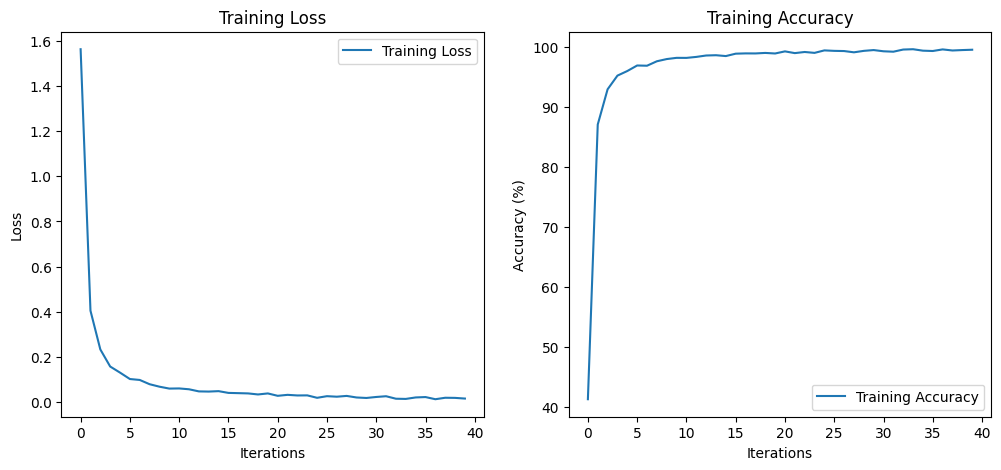

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch import nn, optim
from torch.utils.data import DataLoader
import torch.nn.functional as F
import matplotlib.pyplot as plt

# Step 1: Load the MNIST dataset with transformations
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,), (0.5,))])

trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                      download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=False,
                                     download=True, transform=transform)
testloader = DataLoader(testset, batch_size=64, shuffle=False)

# Step 2: Define the CNN architecture without BatchNorm and with Global Average Pooling
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 128, 3, padding=1)
        self.conv2 = nn.Conv2d(128, 128, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv3 = nn.Conv2d(128, 256, 3, padding=1)
        self.conv4 = nn.Conv2d(256, 256, 3, padding=1)
        self.global_avg_pool = nn.AdaptiveAvgPool2d(1)
        self.fc1 = nn.Linear(256, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(F.relu(self.conv2(x)))
        x = F.relu(self.conv3(x))
        x = self.pool(F.relu(self.conv4(x)))
        x = self.global_avg_pool(x)
        x = x.view(-1, 256)  # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Step 3: Setup GPU usage
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net = Net().to(device)

# Step 4: Setup the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

# Step 5: Train the network
train_losses = []
train_accuracy = []

for epoch in range(10):
    running_loss = 0.0
    correct = 0
    total = 0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        if i % 200 == 199:  # print and record every 200 mini-batches
            avg_loss = running_loss / 200
            accuracy = 100 * correct / total
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {avg_loss:.3f}, Accuracy: {accuracy:.2f}%')
            train_losses.append(avg_loss)
            train_accuracy.append(accuracy)
            running_loss = 0.0
            correct = 0
            total = 0

print('Finished Training')

# Step 6: Evaluate the network on the test data
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10,000 test images: {100 * correct / total}%')

# Step 7: Plot the learning curves for accuracy and loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.show()


In [ ]:

# prompt: count the total number of learnable parameters

total_params = sum(p.numel() for p in net.parameters())
print(f"Total Parameters: {total_params/1000} k")


Total Parameters: 1068.298 k


3-2 BatchNorm 추가한 후

Epoch 1, Batch 200, Loss: 0.538, Accuracy: 85.97%
Epoch 1, Batch 400, Loss: 0.122, Accuracy: 96.59%
Epoch 1, Batch 600, Loss: 0.099, Accuracy: 97.07%
Epoch 1, Batch 800, Loss: 0.074, Accuracy: 97.90%
Epoch 2, Batch 200, Loss: 0.059, Accuracy: 98.20%
Epoch 2, Batch 400, Loss: 0.055, Accuracy: 98.34%
Epoch 2, Batch 600, Loss: 0.049, Accuracy: 98.55%
Epoch 2, Batch 800, Loss: 0.054, Accuracy: 98.30%
Epoch 3, Batch 200, Loss: 0.033, Accuracy: 98.90%
Epoch 3, Batch 400, Loss: 0.043, Accuracy: 98.62%
Epoch 3, Batch 600, Loss: 0.045, Accuracy: 98.65%
Epoch 3, Batch 800, Loss: 0.037, Accuracy: 98.89%
Epoch 4, Batch 200, Loss: 0.029, Accuracy: 99.09%
Epoch 4, Batch 400, Loss: 0.028, Accuracy: 99.16%
Epoch 4, Batch 600, Loss: 0.036, Accuracy: 98.80%
Epoch 4, Batch 800, Loss: 0.041, Accuracy: 98.75%
Epoch 5, Batch 200, Loss: 0.028, Accuracy: 99.10%
Epoch 5, Batch 400, Loss: 0.027, Accuracy: 99.15%
Epoch 5, Batch 600, Loss: 0.032, Accuracy: 98.94%
Epoch 5, Batch 800, Loss: 0.027, Accuracy: 99.12%


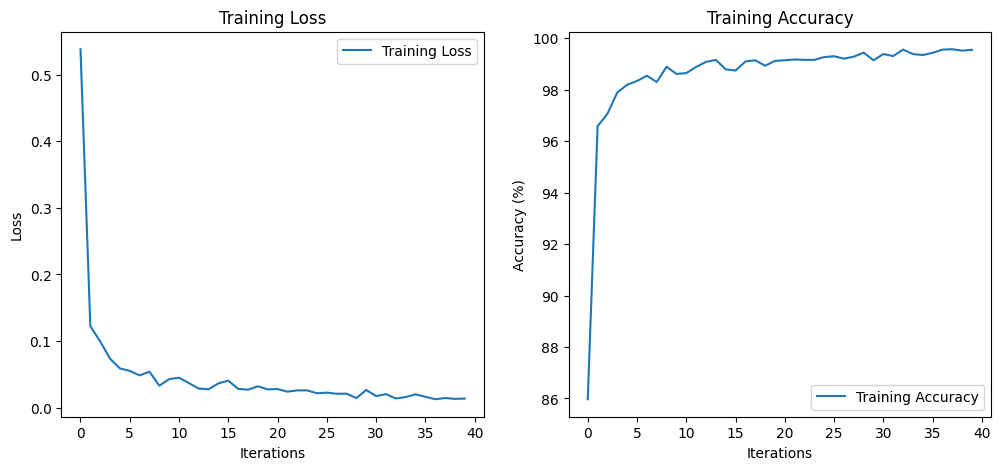

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch import nn, optim
from torch.utils.data import DataLoader
import torch.nn.functional as F
import matplotlib.pyplot as plt

# Step 1: Load the MNIST dataset with transformations
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,), (0.5,))])

trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                      download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=False,
                                     download=True, transform=transform)
testloader = DataLoader(testset, batch_size=64, shuffle=False)

# Step 2: Define the CNN architecture with Global Average Pooling
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 128, 3, padding=1)
        self.bn1 = nn.BatchNorm2d(128)
        self.conv2 = nn.Conv2d(128, 128, 3, padding=1)
        self.bn2 = nn.BatchNorm2d(128)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv3 = nn.Conv2d(128, 256, 3, padding=1)
        self.bn3 = nn.BatchNorm2d(256)
        self.conv4 = nn.Conv2d(256, 256, 3, padding=1)
        self.bn4 = nn.BatchNorm2d(256)
        self.global_avg_pool = nn.AdaptiveAvgPool2d(1)
        self.fc1 = nn.Linear(256, 128)
        self.fc2 = nn.Linear(128, 10)
    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        x = F.relu(self.bn3(self.conv3(x)))
        x = self.pool(F.relu(self.bn4(self.conv4(x))))
        x = self.global_avg_pool(x)
        x = x.view(-1, 256)  # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Step 3: Setup GPU usage
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net = Net().to(device)

# Step 4: Setup the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

# Step 5: Train the network
train_losses = []
train_accuracy = []

for epoch in range(10):
    running_loss = 0.0
    correct = 0
    total = 0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        if i % 200 == 199:  # print and record every 200 mini-batches
            avg_loss = running_loss / 200
            accuracy = 100 * correct / total
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {avg_loss:.3f}, Accuracy: {accuracy:.2f}%')
            train_losses.append(avg_loss)
            train_accuracy.append(accuracy)
            running_loss = 0.0
            correct = 0
            total = 0

print('Finished Training')

# Step 6: Evaluate the network on the test data
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10,000 test images: {100 * correct / total}%')

# Step 7: Plot the learning curves for accuracy and loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.show()


과제4. 실습 과제 4. Lab 3 Transfer Learning 실습에서 ResNet18의 (i) learnable parameters을 고정한 경우와 (ii) 마지막 3개 Layer만 제외하고 나머지 learnable parameters를 고정한 경우, (iii) 모든 레이어를 고정하지 않은 경우에 대해 학습시키고 결과를 논의하세요.

4-1 learnable parameters을 고정한 경우

100%|██████████| 170498071/170498071 [00:01<00:00, 91692197.18it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 94.7MB/s]


Epoch 1, Batch 200, Loss: 0.663, Accuracy: 77.23%
Epoch 1, Batch 400, Loss: 0.490, Accuracy: 83.10%
Epoch 1, Batch 600, Loss: 0.412, Accuracy: 85.94%
Epoch 1 - Training Loss: 0.057, Accuracy: 87.39%, Validation Loss: 0.534, Accuracy: 83.04%
Epoch 2, Batch 200, Loss: 0.256, Accuracy: 91.20%
Epoch 2, Batch 400, Loss: 0.265, Accuracy: 90.77%
Epoch 2, Batch 600, Loss: 0.285, Accuracy: 90.18%
Epoch 2 - Training Loss: 0.036, Accuracy: 91.76%, Validation Loss: 0.316, Accuracy: 89.56%
Epoch 3, Batch 200, Loss: 0.148, Accuracy: 94.74%
Epoch 3, Batch 400, Loss: 0.171, Accuracy: 93.89%
Epoch 3, Batch 600, Loss: 0.173, Accuracy: 93.95%
Epoch 3 - Training Loss: 0.026, Accuracy: 93.79%, Validation Loss: 0.331, Accuracy: 89.76%
Epoch 4, Batch 200, Loss: 0.091, Accuracy: 96.69%
Epoch 4, Batch 400, Loss: 0.101, Accuracy: 96.57%
Epoch 4, Batch 600, Loss: 0.125, Accuracy: 95.82%
Epoch 4 - Training Loss: 0.020, Accuracy: 95.38%, Validation Loss: 0.328, Accuracy: 90.02%
Epoch 5, Batch 200, Loss: 0.059, Acc

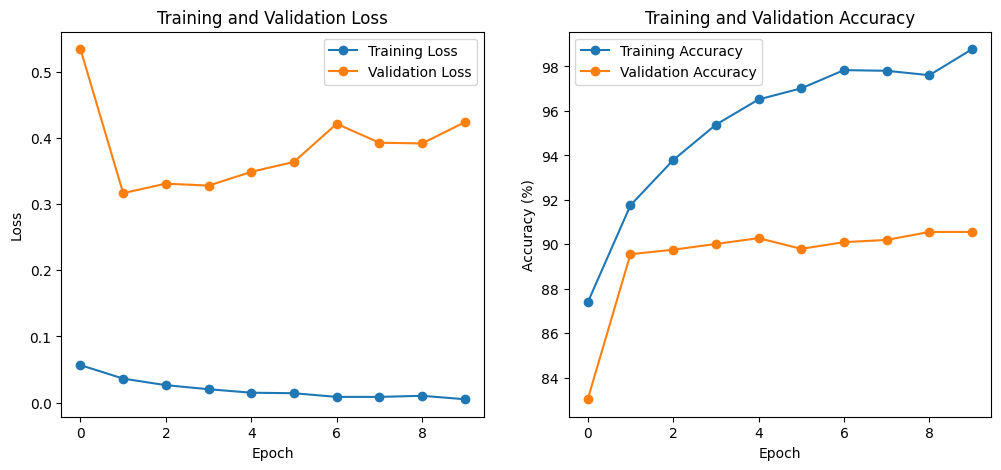

In [ ]:

import torch
import torchvision
import torchvision.transforms as transforms
from torch import nn, optim
from torch.utils.data import DataLoader, SubsetRandomSampler
from sklearn.model_selection import StratifiedShuffleSplit
import numpy as np
import torch.nn.functional as F
import matplotlib.pyplot as plt
import torchvision.models as models

# Step 1: Load the CIFAR-10 dataset with transformations
transform = transforms.Compose([
    transforms.Resize(224),  # Resize images to fit ResNet input
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Adjusted for 3 channels
])


trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

# Same stratified split setup
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=42)
targets = trainset.targets
for train_index, val_index in sss.split(np.zeros(len(targets)), targets):
    train_sampler = SubsetRandomSampler(train_index)
    val_sampler = SubsetRandomSampler(val_index)

trainloader = DataLoader(trainset, batch_size=64, sampler=train_sampler)
valloader = DataLoader(trainset, batch_size=64, sampler=val_sampler)
testloader = DataLoader(testset, batch_size=64, shuffle=False)


# Step 2: Define the CNN architecture with pretrained resnet18
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        # Load a pretrained ResNet and modify it
        self.resnet = models.resnet18(pretrained=True)

        # Freeze all the layers in the network
        for param in self.resnet.parameters():
            param.requires_grad = False

        # CIFAR-10 has 10 classes, modify the last fully connected layer
        num_ftrs = self.resnet.fc.in_features
        self.resnet.fc = nn.Linear(num_ftrs, 10)  # Adjust for 10 classes

    def forward(self, x):
        return self.resnet(x)

# Step 3: Setup GPU usage
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net = Net().to(device)

# Step 4: Setup the loss function and optimizer
criterion = nn.CrossEntropyLoss()

# Freeze all layers except the last 3 layers
for param in net.parameters():
    param.requires_grad = False

for param in net.resnet.layer3.parameters():
    param.requires_grad = True
for param in net.resnet.layer4.parameters():
    param.requires_grad = True
for param in net.resnet.fc.parameters():
    param.requires_grad = True

# Parameters of the optimizer to update only the last 3 layers
params_to_update = []
for name, param in net.named_parameters():
    if param.requires_grad == True:
        params_to_update.append(param)

optimizer = optim.Adam(params_to_update, lr=0.001)

# Step 5: Train the network and validate every epoch
train_losses = []
train_accuracy = []
val_losses = []
val_accuracy = []

for epoch in range(10):
    running_loss = 0.0
    correct = 0
    total = 0
    net.train()
    for i, data in enumerate(trainloader):
        inputs, labels = data[0].to(device), data[1].to(device)

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        if i % 200 == 199:  # print and record every 200 mini-batches
            avg_loss = running_loss / 200
            accuracy = 100 * correct / total
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {avg_loss:.3f}, Accuracy: {accuracy:.2f}%')
            running_loss = 0.0
            correct = 0
            total = 0

    train_losses.append(running_loss / len(trainloader))
    train_accuracy.append(100 * correct / total)

    # Validation step
    net.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for data in valloader:
            inputs, labels = data[0].to(device), data[1].to(device)
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    val_losses.append(val_loss / len(valloader))
    val_accuracy.append(100 * correct / total)

    print(f'Epoch {epoch+1} - Training Loss: {train_losses[-1]:.3f}, Accuracy: {train_accuracy[-1]:.2f}%, Validation Loss: {val_losses[-1]:.3f}, Accuracy: {val_accuracy[-1]:.2f}%')

print('Finished Training')

# Step 6: Evaluate the network on the test data
correct = 0
total = 0
net.eval()
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_accuracy = 100 * correct / total
print(f'Accuracy of the network on the 10,000 test images: {test_accuracy:.2f}%')

# Step 7: Plot the learning curves for accuracy and loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, '-o',label='Training Loss')
plt.plot(val_losses, '-o', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracy,  '-o',label='Training Accuracy')
plt.plot(val_accuracy, '-o', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.show()


In [9]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(images, labels, predicted_labels):
    """Function to display images with labels and predictions"""
    # Set number of images to display
    num_images = len(images)
    fig, axes = plt.subplots(1, num_images, figsize=(num_images * 3, 3))

    for idx in range(num_images):
        ax = axes[idx]
        img = images[idx] / 2 + 0.5  # unnormalize
        npimg = img.numpy()
        ax.imshow(np.transpose(npimg, (1, 2, 0)))
        ax.axis('off')
        # Set title with predicted and true labels
        ax.set_title(f'Pred: {classes[predicted_labels[idx]]}\nTrue: {classes[labels[idx]]}')

# Load a batch of images
dataiter = iter(testloader)
images, labels = next(dataiter)

# Predict labels
predicted_outputs = net(images.to(device))
_, predicted = torch.max(predicted_outputs, 1)

# Show images with annotations
imshow(images[:10], labels[:10], predicted[:10])
plt.show()

NameError: name 'device' is not defined

Predicted:  cat   ship  ship  plane frog 
True:       cat   ship  ship  plane frog 


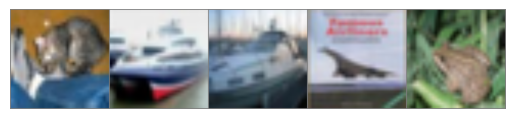

In [ ]:

import matplotlib.pyplot as plt
import numpy as np

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis('off')

# Get some random test images
dataiter = iter(testloader)
images, labels = next(dataiter)

# Show images
imshow(torchvision.utils.make_grid(images[:5]))
# Print labels
predicted_outputs = net(images.to(device))
_, predicted = torch.max(predicted_outputs, 1)
print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(5)))
print('True:      ', ' '.join(f'{classes[labels[j]]:5s}'
                              for j in range(5)))

plt.show()



4-2 마지막 3개 Layer만 제외하고 나머지 learnable parameters를 고정한 경우

Epoch 1, Batch 200, Loss: 0.028, Accuracy: 99.12%
Epoch 1, Batch 400, Loss: 0.024, Accuracy: 99.17%
Epoch 1, Batch 600, Loss: 0.028, Accuracy: 99.13%
Epoch 1 - Training Loss: 0.003, Accuracy: 99.27%, Validation Loss: 0.383, Accuracy: 91.32%
Epoch 2, Batch 200, Loss: 0.010, Accuracy: 99.76%
Epoch 2, Batch 400, Loss: 0.011, Accuracy: 99.64%
Epoch 2, Batch 600, Loss: 0.018, Accuracy: 99.38%
Epoch 2 - Training Loss: 0.004, Accuracy: 99.23%, Validation Loss: 0.423, Accuracy: 90.94%
Epoch 3, Batch 200, Loss: 0.016, Accuracy: 99.47%
Epoch 3, Batch 400, Loss: 0.011, Accuracy: 99.62%
Epoch 3, Batch 600, Loss: 0.014, Accuracy: 99.52%
Epoch 3 - Training Loss: 0.002, Accuracy: 99.45%, Validation Loss: 0.435, Accuracy: 91.56%
Epoch 4, Batch 200, Loss: 0.007, Accuracy: 99.80%
Epoch 4, Batch 400, Loss: 0.010, Accuracy: 99.68%
Epoch 4, Batch 600, Loss: 0.010, Accuracy: 99.67%
Epoch 4 - Training Loss: 0.001, Accuracy: 99.73%, Validation Loss: 0.467, Accuracy: 91.24%
Epoch 5, Batch 200, Loss: 0.006, Acc

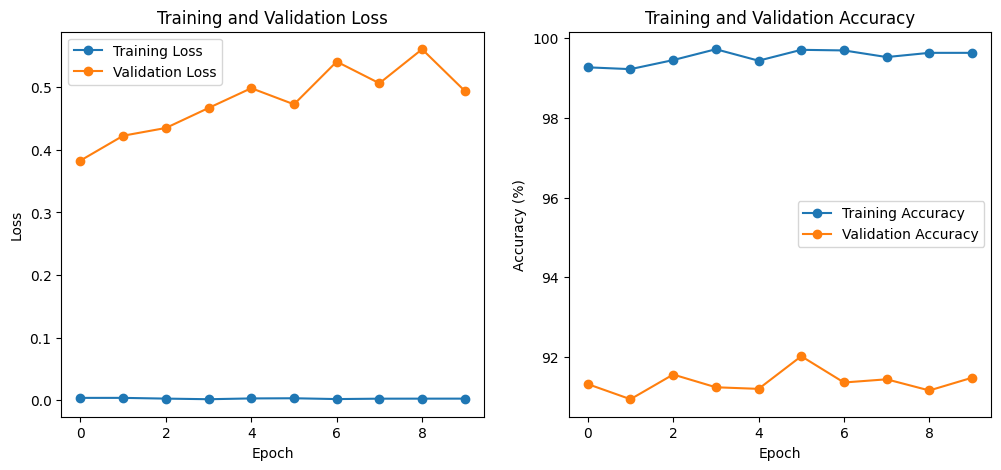

In [ ]:
# Step 4: Setup the loss function and optimizer

# Freeze all layers except the last 3 layers
for param in net.parameters():
    param.requires_grad = False

# Unfreeze the last 3 layers
for param in net.resnet.layer4.parameters():
    param.requires_grad = True
for param in net.resnet.avgpool.parameters():
    param.requires_grad = True
for param in net.resnet.fc.parameters():
    param.requires_grad = True

# Parameters of the optimizer to update only the last 3 layers
params_to_update = []
for name, param in net.named_parameters():
    if param.requires_grad == True:
        params_to_update.append(param)

optimizer = optim.Adam(params_to_update, lr=0.001)

# Step 5: Train the network and validate every epoch
train_losses = []
train_accuracy = []
val_losses = []
val_accuracy = []

for epoch in range(10):
    running_loss = 0.0
    correct = 0
    total = 0
    net.train()
    for i, data in enumerate(trainloader):
        inputs, labels = data[0].to(device), data[1].to(device)

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        if i % 200 == 199:  # print and record every 200 mini-batches
            avg_loss = running_loss / 200
            accuracy = 100 * correct / total
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {avg_loss:.3f}, Accuracy: {accuracy:.2f}%')
            running_loss = 0.0
            correct = 0
            total = 0

    train_losses.append(running_loss / len(trainloader))
    train_accuracy.append(100 * correct / total)

    # Validation step
    net.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for data in valloader:
            inputs, labels = data[0].to(device), data[1].to(device)
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    val_losses.append(val_loss / len(valloader))
    val_accuracy.append(100 * correct / total)

    print(f'Epoch {epoch+1} - Training Loss: {train_losses[-1]:.3f}, Accuracy: {train_accuracy[-1]:.2f}%, Validation Loss: {val_losses[-1]:.3f}, Accuracy: {val_accuracy[-1]:.2f}%')

print('Finished Training')

# Step 6: Evaluate the network on the test data
correct = 0
total = 0
net.eval()
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_accuracy = 100 * correct / total
print(f'Accuracy of the network on the 10,000 test images: {test_accuracy:.2f}%')

# Step 7: Plot the learning curves for accuracy and loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, '-o',label='Training Loss')
plt.plot(val_losses, '-o', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracy,  '-o',label='Training Accuracy')
plt.plot(val_accuracy, '-o', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.show()


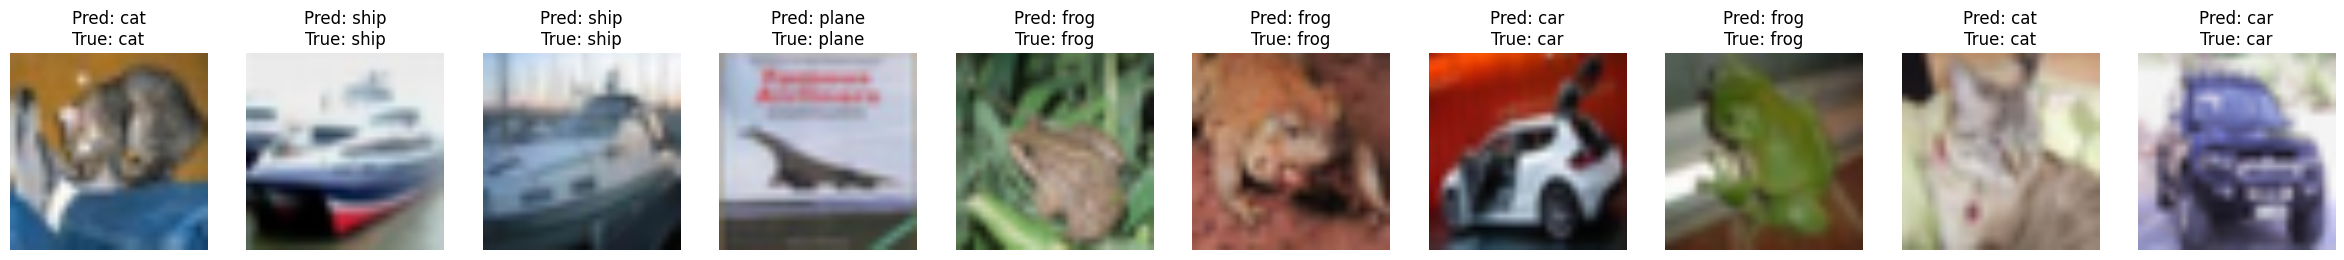

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(images, labels, predicted_labels):
    """Function to display images with labels and predictions"""
    # Set number of images to display
    num_images = len(images)
    fig, axes = plt.subplots(1, num_images, figsize=(num_images * 3, 3))

    for idx in range(num_images):
        ax = axes[idx]
        img = images[idx] / 2 + 0.5  # unnormalize
        npimg = img.numpy()
        ax.imshow(np.transpose(npimg, (1, 2, 0)))
        ax.axis('off')
        # Set title with predicted and true labels
        ax.set_title(f'Pred: {classes[predicted_labels[idx]]}\nTrue: {classes[labels[idx]]}')

# Load a batch of images
dataiter = iter(testloader)
images, labels = next(dataiter)

# Predict labels
predicted_outputs = net(images.to(device))
_, predicted = torch.max(predicted_outputs, 1)

# Show images with annotations
imshow(images[:10], labels[:10], predicted[:10])
plt.show()

Predicted:  cat   ship  ship  plane frog 
True:       cat   ship  ship  plane frog 


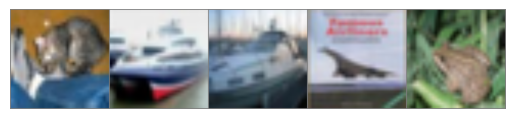

In [ ]:

import matplotlib.pyplot as plt
import numpy as np

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis('off')

# Get some random test images
dataiter = iter(testloader)
images, labels = next(dataiter)

# Show images
imshow(torchvision.utils.make_grid(images[:5]))
# Print labels
predicted_outputs = net(images.to(device))
_, predicted = torch.max(predicted_outputs, 1)
print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(5)))
print('True:      ', ' '.join(f'{classes[labels[j]]:5s}'
                              for j in range(5)))

plt.show()

4-3 모든 레이어를 고정하지 않은 경우

Epoch 1, Batch 200, Loss: 0.351, Accuracy: 91.70%
Epoch 1, Batch 400, Loss: 0.154, Accuracy: 95.33%
Epoch 1, Batch 600, Loss: 0.147, Accuracy: 95.47%
Epoch 1 - Training Loss: 0.019, Accuracy: 95.89%, Validation Loss: 0.375, Accuracy: 89.68%
Epoch 2, Batch 200, Loss: 0.057, Accuracy: 98.08%
Epoch 2, Batch 400, Loss: 0.073, Accuracy: 97.52%
Epoch 2, Batch 600, Loss: 0.102, Accuracy: 96.61%
Epoch 2 - Training Loss: 0.013, Accuracy: 96.92%, Validation Loss: 0.494, Accuracy: 87.96%
Epoch 3, Batch 200, Loss: 0.075, Accuracy: 97.58%
Epoch 3, Batch 400, Loss: 0.073, Accuracy: 97.44%
Epoch 3, Batch 600, Loss: 0.078, Accuracy: 97.27%
Epoch 3 - Training Loss: 0.012, Accuracy: 97.08%, Validation Loss: 0.407, Accuracy: 89.02%
Epoch 4, Batch 200, Loss: 0.048, Accuracy: 98.40%
Epoch 4, Batch 400, Loss: 0.069, Accuracy: 97.70%
Epoch 4, Batch 600, Loss: 0.068, Accuracy: 97.65%
Epoch 4 - Training Loss: 0.010, Accuracy: 97.47%, Validation Loss: 0.473, Accuracy: 89.22%
Epoch 5, Batch 200, Loss: 0.041, Acc

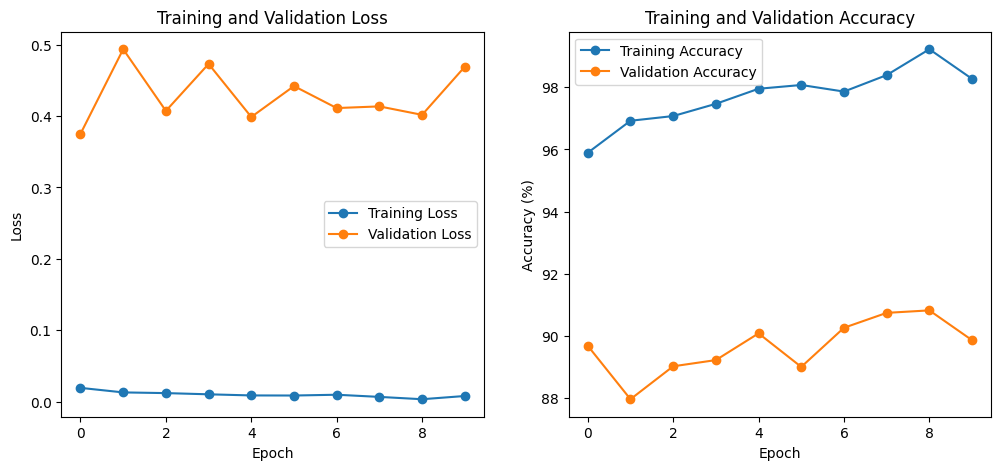

In [ ]:
# Step 4: Setup the loss function and optimizer

# Unfreeze all layers
for param in net.parameters():
    param.requires_grad = True

optimizer = optim.Adam(net.parameters(), lr=0.001)

# Step 5: Train the network and validate every epoch
train_losses = []
train_accuracy = []
val_losses = []
val_accuracy = []

for epoch in range(10):
    running_loss = 0.0
    correct = 0
    total = 0
    net.train()
    for i, data in enumerate(trainloader):
        inputs, labels = data[0].to(device), data[1].to(device)

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        if i % 200 == 199:  # print and record every 200 mini-batches
            avg_loss = running_loss / 200
            accuracy = 100 * correct / total
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {avg_loss:.3f}, Accuracy: {accuracy:.2f}%')
            running_loss = 0.0
            correct = 0
            total = 0

    train_losses.append(running_loss / len(trainloader))
    train_accuracy.append(100 * correct / total)

    # Validation step
    net.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for data in valloader:
            inputs, labels = data[0].to(device), data[1].to(device)
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    val_losses.append(val_loss / len(valloader))
    val_accuracy.append(100 * correct / total)

    print(f'Epoch {epoch+1} - Training Loss: {train_losses[-1]:.3f}, Accuracy: {train_accuracy[-1]:.2f}%, Validation Loss: {val_losses[-1]:.3f}, Accuracy: {val_accuracy[-1]:.2f}%')

print('Finished Training')

# Step 6: Evaluate the network on the test data
correct = 0
total = 0
net.eval()
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_accuracy = 100 * correct / total
print(f'Accuracy of the network on the 10,000 test images: {test_accuracy:.2f}%')

# Step 7: Plot the learning curves for accuracy and loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, '-o',label='Training Loss')
plt.plot(val_losses, '-o', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracy,  '-o',label='Training Accuracy')
plt.plot(val_accuracy, '-o', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.show()
